`Notes`
TensorFlow is a more complex library for distributed numerical computation using data flow graphs. It makes it possible to train and run very large neural networks efficiently by distributing the computations across potentially thousands of multi-GPU servers. TensorFlow was created at Google and supports many of their large-scale Machine Learning applications. It was open-sourced in November 2015.

使用数据流图进行分布式数值计算的更复杂的库。通过在数千个多GPU服务器上分配计算，可以有效地训练和运行非常大的神经网络。

Deep Learning is best suited for complex problems such as image recognition, speech recognition, or natural language processing, provided you have enough data, computing power, and patience.

To summarize, Machine Learning is great for:
- Problems for which existing solutions require a lot of hand-tuning or long lists of rules: one Machine Learning algorithm can often simplify code and perform better.
- Complex problems for which there is no good solution at all using a traditional approach: the best Machine Learning techniques can find a solution.
- Fluctuating environments: a Machine Learning system can adapt to new data.
- Getting insights about complex problems and large amounts of data.


1. 根据训练期间接受的监督数量和监督类型，可以将机器学习系统分为以下四个主要类别：监督式学习、无监督式学习、半监督式学习和强化学习。
2. 还有一个给机器学习系统分类的标准，是看系统是否可以从传入的数据流中进行增量学习。（批量学习/在线学习）
> 在线学习面临的一个重大挑战是，如果给系统输入不良数据，系统的性能将会逐渐下降。现在某些实时系统的客户说不定已经注意到了这个现象。不良数据的来源可能是，例如，机器上发生故障的传感器，或者是有人对搜索引擎恶意刷屏以提高搜索结果排名等。为了降低这种风险，你需要密切监控你的系统，一旦检测到性能下降，要及时中断学习（可能还需要恢复到之前的工作状态）。当然，同时你还需要监控输入数据，并对异常数据做出响应（例如，使用异常检测算法）。
3. 另一种对机器学习系统进行分类的方法是看它们如何泛化。大多数机器学习任务是要做出预测。这意味着，系统需要通过给定的训练示例，在它此前并未见过的示例上进行泛化。在训练数据上实现良好的性能指标固然重要，但是还不够充分；真正的目的是要在新的对象实例上表现出色。(基于实例的学习和基于模型的学习。)
4. 表现。要么定义一个效用函数（或适应度函数）来衡量模型有多好，要么定义一个成本函数来衡量模型有多差。对于线性回归问题，通常的选择是使用成本函数来衡量线性模型的预测与训练实例之间的差距，目的在于尽量使这个差距最小化。
> 表现。要么定义一个效用函数（或适应度函数）来衡量模型有多好，要么定义一个成本函数来衡量模型有多差。对于线性回归问题，通常的选择是使用成本函数来衡量线性模型的预测与训练实例之间的差距，目的在于尽量使这个差距最小化。

In [15]:
import numpy as np
import pandas as pd
import sklearn 
import os

print("numpy version",np.__version__)
print("pandas version",pd.__version__)
print("sklearn version",sklearn.__version__)

numpy version 1.15.1
pandas version 0.23.4
sklearn version 0.20.1


In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [17]:
# https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/
datapath = "datasets/lifesat/"
oecd_bli = pd.read_csv(datapath+"oecd_bli_2015.csv",thousands=',')
oecd_bli  =oecd_bil[oecd_bli["INEQUALITY"] == "TOT"] 
# oecd_bil = oecd_bil.pivot_table(index="Country",columns="Indicator",values="Value")
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.sample(5)

d:\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5
Spain,24.0,4.2,7.3,0.1,55.0,5.89,56.0,0.6,22477.0,24774.0,...,12.96,34824.0,95.0,1.9,72.0,490.0,16.06,69.0,71.0,17.6
Slovenia,26.0,3.9,10.3,0.5,85.0,5.63,63.0,0.4,19326.0,18465.0,...,5.15,32037.0,90.0,1.5,65.0,499.0,14.62,52.0,88.0,18.4
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
OECD - Total,20.0,3.9,7.3,2.4,75.0,12.51,65.0,4.0,25908.0,67139.0,...,2.79,36118.0,88.0,1.8,68.0,497.0,14.97,68.0,81.0,17.7


In [18]:
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=','
                             ,delimiter='\t',encoding = 'latin1',na_values="n/a")
gdp_per_capita.rename(columns={"2015":"GDP per capita"},inplace=True)
gdp_per_capita.set_index("Country",inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [20]:
full_country_stats = pd.merge(left=oecd_bli,right=gdp_per_capita,
                              left_index=True,right_index=True)
full_country_stats.sort_values(by="GDP per capita",inplace=True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [21]:
full_country_stats[["GDP per capita","Life satisfaction"]].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [22]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita","Life satisfaction"]].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita","Life satisfaction"]].iloc[remove_indices]

In [23]:
sample_data.head()

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1


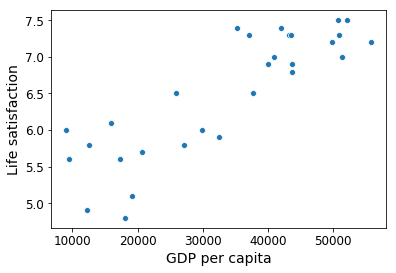

In [33]:
import seaborn as sns; sns.set
country_id = ["Hungary","Korea","France","Australia","United States"]
sns.scatterplot(x='GDP per capita',y='Life satisfaction',data=sample_data)

In [57]:
from sklearn import linear_model
fit_lr1 = linear_model.LinearRegression()
X = sample_data["GDP per capita"]
X = X[:,np.newaxis]                
Y = sample_data["Life satisfaction"]
fit_lr1.fit(X,Y)
fit_coef,fit_intercept = fit_lr1.coef_ , fit_lr1.intercept_
print("fit_coef = ",fit_coef,"fit_intercept = ",fit_intercept)

fit_coef =  [4.91154459e-05] fit_intercept =  4.853052800266437


In [72]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus","GDP per capita"]
print(cyprus_gdp_per_capita)
pred_cyprus_life_satisfaction = fit_lr1.predict([[cyprus_gdp_per_capita]])
pred_cyprus_life_satisfaction

22587.49


array([5.96244744])

`Main Challenges of Machine Learning`
- Insufficient Quantity of Training Data (data matters more than algorithms)
- Nonrepresentative Training Data
> if the sample is too small, you will have sampling noise (i.e., nonrepresentative data as a result of chance), but even very large samples can be nonrepresentative if the sampling method is flawed. This is called sampling bias.
- Poor-Quality Data (errors, outliers, and noise)
- Irrelevant Features
     - Feature selection: selecting the most useful features to train on among existing features.
     - Feature extraction: combining existing features to produce a more useful one (as we saw earlier, dimensionality reduction algorithms can help).
     - Creating new features by gathering new data.
- Overfitting the Training Data
    - To simplify the model by selecting one with fewer parameters
    - To gather more training data
    - To reduce the noise in the training data(e.g., fix data errors and remove outliers)
> A hyperparameter is a parameter of a learning algorithm (not of the model). As such, it is not affected by the learning algorithm itself; it must be set prior to training and remains constant during training.
- Underfitting the Training Data
    - Selecting a more powerful model, with more parameters
    - Feeding better features to the learning algorithm (feature engineering)
    - Reducing the constraints on the model (e.g., reducing the regularization hyperparameter)

`Testing and Validating`
The error rate on new cases is called the generalization error (or out-of-sample error)(泛化误差)。

You train multiple models with various hyperparameters using the training set, you select the model and hyperparameters that perform best on the validation set, and when you’re happy with your model you run a single final test against the test set to get an estimate of the generalization error.

为了避免验证集“浪费”太多的训练数据，常见的技术是使用交叉验证：将训练集分成若干个互补子集，然后每个模型都通过这些子集的不同组合来进行训练，之后用剩余的子集进行验证。一旦模型和超参数都被选定，最终的模型会带着这些超参数对整个训练集进行一次训练，最后再用测试集测量泛化误差。

In a famous 1996 paper,11 David Wolpert demonstrated that if you make absolutely no assumption about the data, then there is no reason to prefer one model over any other. This is called the No Free Lunch (NFL) theorem.
如果你对数据绝对没有任何假设，那么你没有理由会更偏好于某个模型。

\begin{exercise}Exercises
\end{exercise}


1. How would you define Machine Learning?
> Machine Learning is about building systems that can learn from data. Learning means getting better at some task, given some performance measure.
2. Can you name four types of problems where it shines?
3. What is a labeled training set?
> A labeled training set is a training set that contains the desired solution (a.k.a. a label) for each instance.
4. What are the two most common supervised tasks?
> The two most common supervised tasks are regression and classification.
5. Can you name four common unsupervised tasks?
> Common unsupervised tasks include clustering, visualization, dimensionality reduction, and association rule learning.
6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?
> Reinforcement Learning
7. What type of algorithm would you use to segment your customers into multiple groups?
> If you don’t know how to define the groups, then you can use a clustering algorithm (unsupervised learning) to segment your customers into clusters of similar customers. However, if you know what groups you would like to have, then you can feed many examples of each group to a classification algorithm (supervised learning), and it will classify all your customers into these groups.
8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?
> Spam detection is a typical supervised learning problem: the algorithm is fed many emails along with their label (spam or not spam).
9. What is an online learning system?
> An online learning system can learn incrementally, as opposed to a batch learning system. This makes it capable of adapting rapidly to both changing data and autonomous systems, and of training on very large quantities of data.
10. What is out-of-core learning?
> Out-of-core algorithms can handle vast quantities of data that cannot fit in a computer’s main memory. An out-of-core learning algorithm chops the data into mini-batches and uses online learning techniques to learn from these mini-batches.
11. What type of learning algorithm relies on a similarity measure to make predictions?
> An instance-based learning system learns the training data by heart; then, when given a new instance, it uses a similarity measure to find the most similar learned instances and uses them to make predictions.
12. What is the difference between a model parameter and a learning algorithm’s hyperparameter?
> A model has one or more model parameters that determine what it will predict given a new instance (e.g., the slope of a linear model). A learning algorithm tries to find optimal values for these parameters such that the model generalizes well to new instances. A hyperparameter is a parameter of the learning algorithm itself, not of the model (e.g., the amount of regularization to apply).
13. What do model-based learning algorithms search for? What is the most common strategy they use to succeed? How do they make predictions?
> Model-based learning algorithms search for an optimal value for the model parameters such that the model will generalize well to new instances.
14. Can you name four of the main challenges in Machine Learning?
> Some of the main challenges in Machine Learning are the lack of data, poor data quality, nonrepresentative data, uninformative features, excessively simple models that underfit the training data, and excessively complex models that overfit the data.
15. If your model performs great on the training data but generalizes poorly to new instances, what is happening? Can you name three possible solutions?
16. What is a test set and why would you want to use it?
17. What is the purpose of a validation set?
> A validation set is used to compare models. It makes it possible to select the best model and tune the hyperparameters.
18. What can go wrong if you tune hyperparameters using the test set?
19. What is cross-validation and why would you prefer it to a validation set?
> If you tune hyperparameters using the test set, you risk overfitting the test set, and the generalization error you measure will be optimistic